# Laboratorio 2 - Agrupación 

### Grupo 23
- **Estudiante 1** : Ana María Hernández Lasso
- **Estudiante 2** : Juan Sebastián Ardila López
- **Estudiante 3** : William Andrés Bayona Vergara

## 1. Exploración de datos

### Carga del dataset

Primero, cargaremos el dataset desde el archivo CSV.

In [51]:
import pandas as pd
import numpy as np

#Cargamos el dataset de los datos de entrenamiento
datos_senecafe = pd.read_csv("Datos_SenecaféAlpes.csv", sep=";")

#Veamos las dimensiones del dataset
filas, columnas = datos_senecafe.shape
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)

#Veamos el dataframe para entender mejor los datos
datos_senecafe

Cantidad de filas: 14291
Cantidad de columnas: 19


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.00,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.00,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.00,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.60,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.00,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,G005192,83266,1117778.00,448.473710,237.747098,Alargado,0.847920,84030.0,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319,NaN,Lavado
14287,G013419,39857,755392.00,283.623668,179.430885,Alargado,0.774448,40330.0,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183,Normal,Natural
14288,G005391,90004,1156599.00,456.836383,252.353553,Alargado,0.833583,90790.0,NaN,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035,Normal,Lavado
14289,G000861,38426,711412.00,246.696608,198.555756,redondeado,0.593467,38799.0,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826,NaN,NaN


In [52]:
#Veamos las columnas y sus tipos de datos
datos_senecafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

En el diccionario de datos se hace referencia a 19 columnas. En efecto, en los datos compartidos este es el número de columnas existentes. 

### Tipos de Datos


In [53]:
#Según el tipo de dato podemos saber cuáles podrían llegar ser variables categóricas o numéricas, o si hay algo extraño

#Traemos las columnas de tipo object, que suelen ser texto
lista_variables_texto = datos_senecafe.select_dtypes(include=["object"]).columns

#Traemos las columnas de tipo int64, float64
lista_variables_numero = datos_senecafe.select_dtypes(include=['float64', 'int64']).columns

#Ahora podemos conocerlas mejor
print("Lista variables de texto:")
print(lista_variables_texto)
print("-------------")
print("Lista variables de número:")
print(lista_variables_numero)
print("-------------")
print("Cantidad de variables de texto:", len(lista_variables_texto))
print("Cantidad de variables de número:", len(lista_variables_numero))

Lista variables de texto:
Index(['ID', 'RelacionAspecto', 'DefectoVisible', 'MétodoSecado'], dtype='object')
-------------
Lista variables de número:
Index(['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
       'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida',
       'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2',
       'FactorForma3', 'FactorForma4'],
      dtype='object')
-------------
Cantidad de variables de texto: 4
Cantidad de variables de número: 15


Hemos podido ver que los nombres de las columnas presentes y el tipo de dato para cada una concuerda con la descripción dada en el diccionario de datos por la empresa.

### Visualización Datos Numericos

Vamos a visualizar todas las variables numeritas de tipo float por medio de boxplots

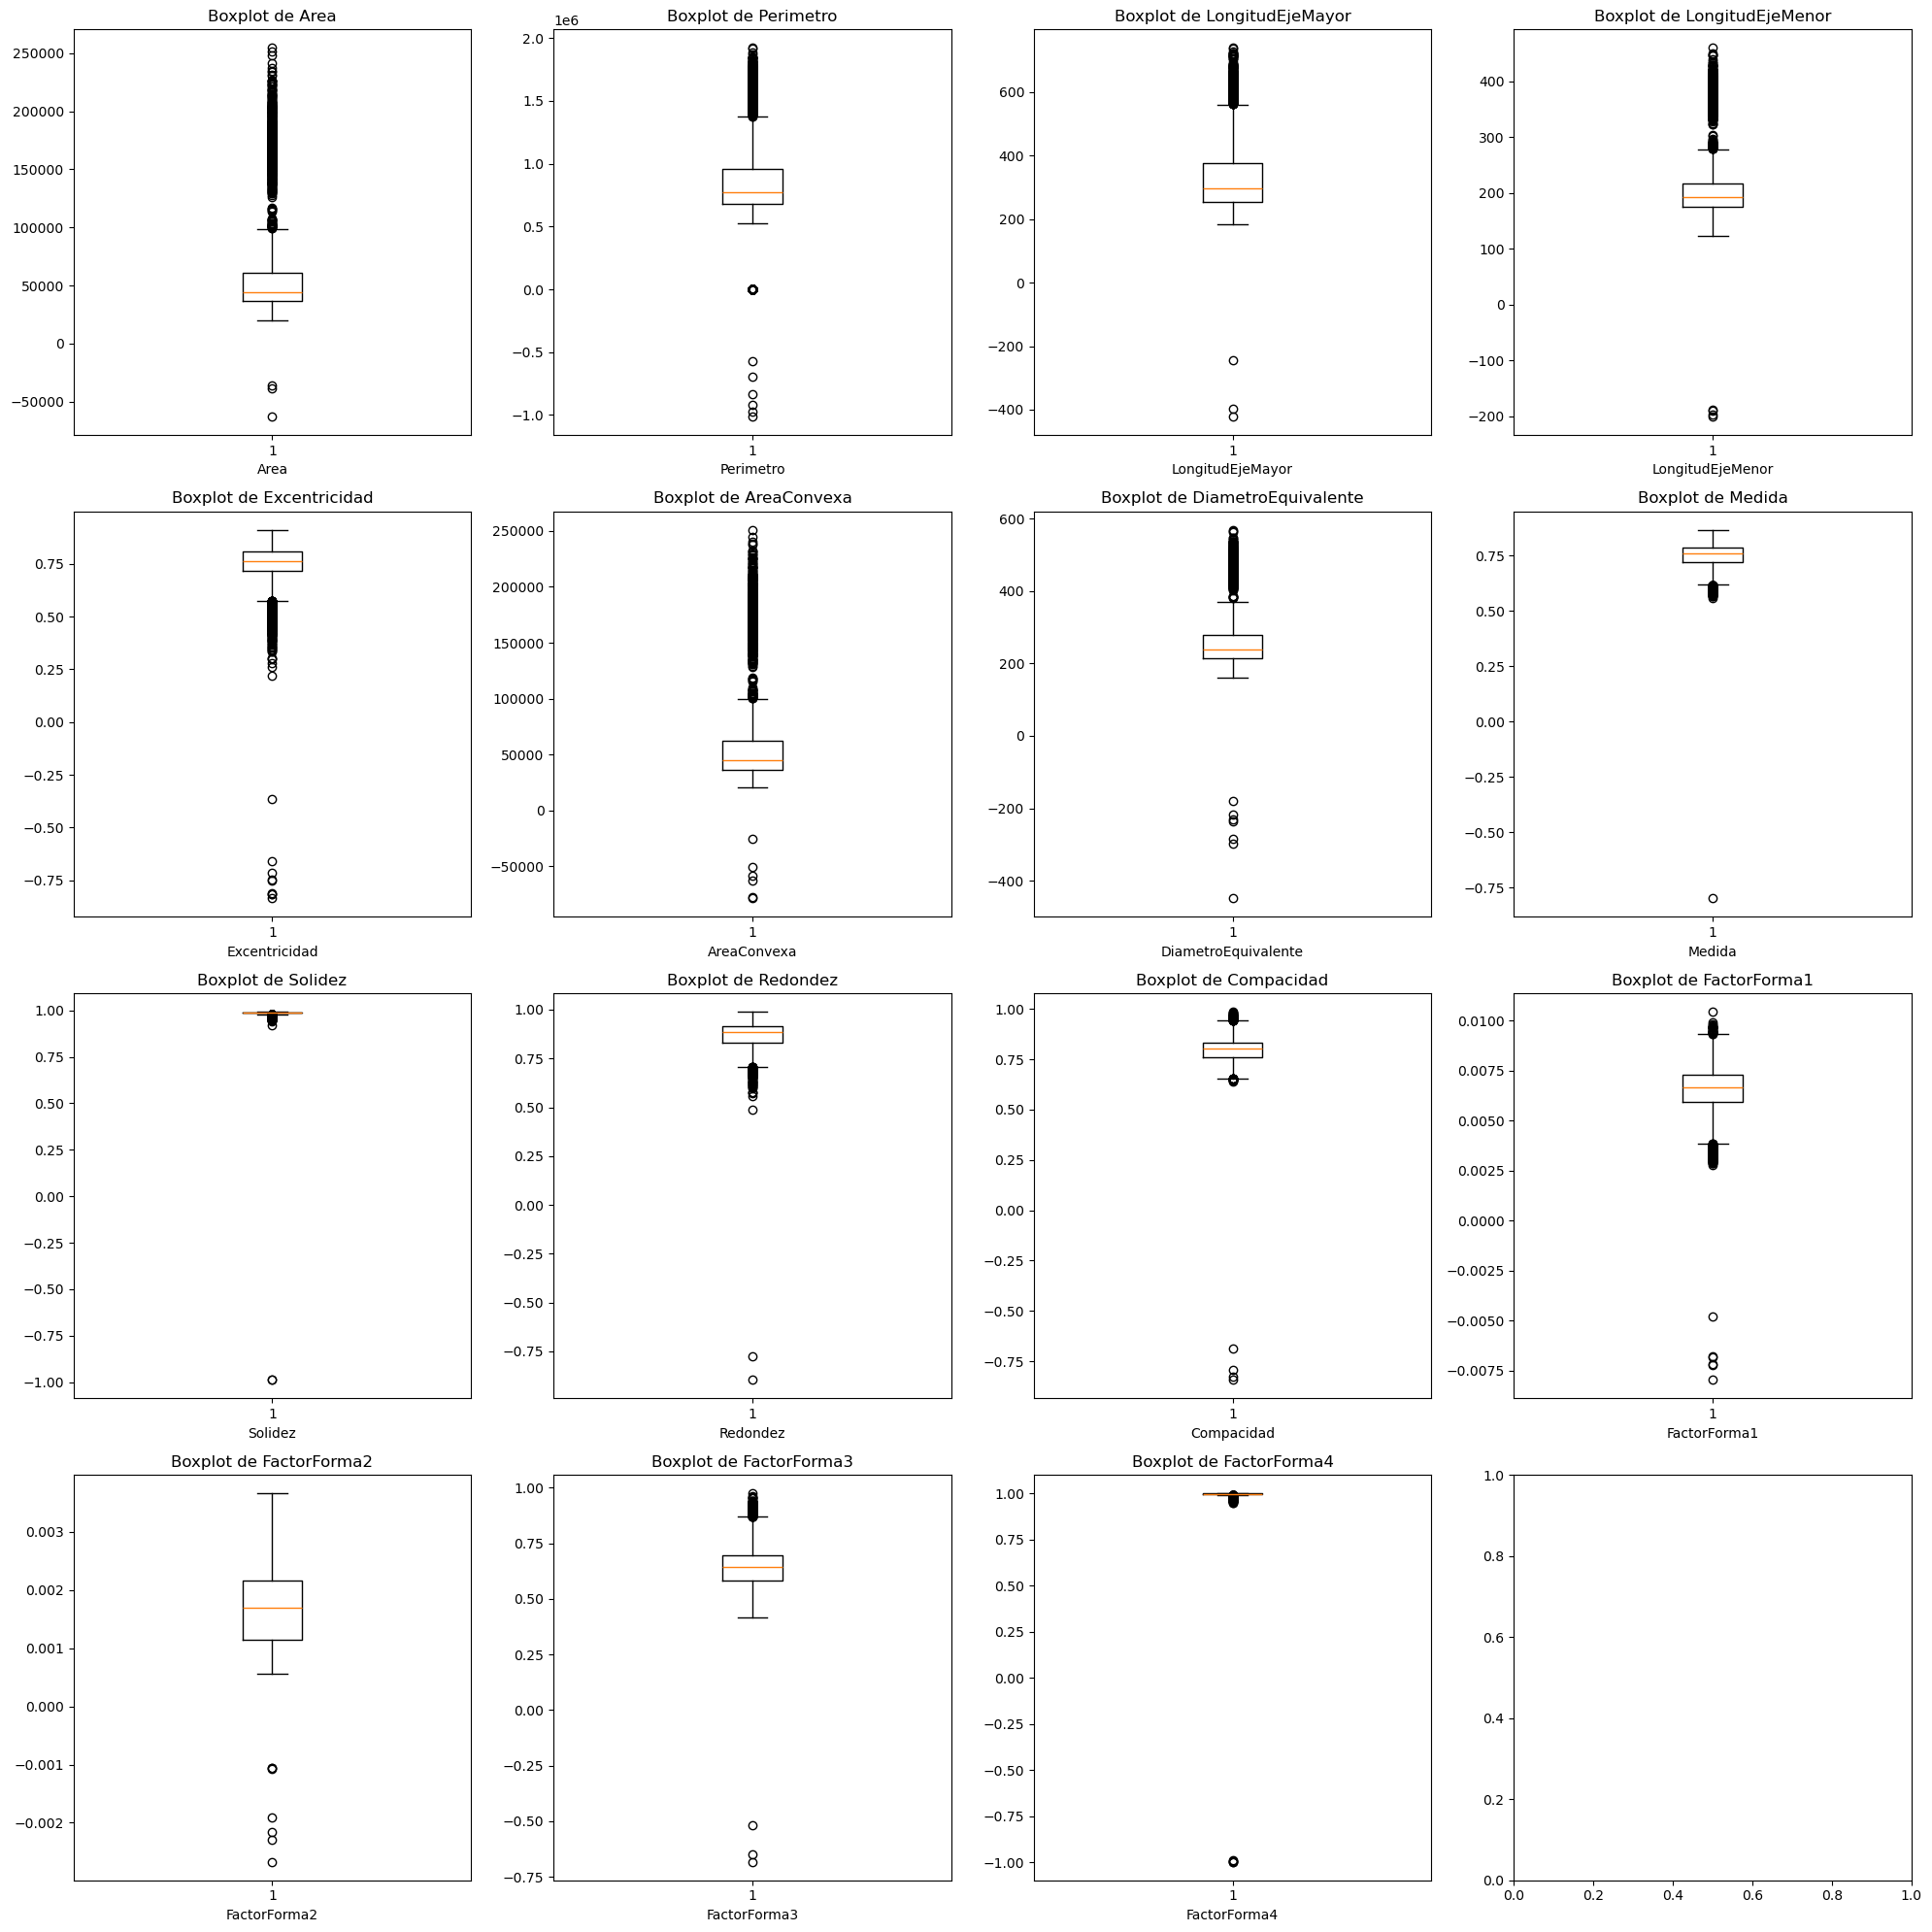

In [54]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(4, 4, figsize=(20, 20))

for i, var in enumerate(lista_variables_numero):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    ax.boxplot(datos_senecafe[var].dropna())
    ax.set_title(f'Boxplot de {var}')
    ax.set_xlabel(var)


plt.tight_layout()
plt.show()

### Consideraciones sobre los datos

Por ahora, como estamos en la etapa de entendimiento de los datos, dejaremos anotadas las observaciones a las que hemos llegado sobre los mismos:

1. La columna `RelaciónAspecto`, encargada de indicar si el grano es Alargado (> 1.3) o Redondeado (≤ 1.3), contiene términos como "Alargado" y "alargado", que aunque en el idioma español tienen el mismo significado y por ende darían una misma clasificación, en los datos se encuentran diferenciados por su inicial en letra minúscula o mayúscula. Más adelante debemos tratar eso.

2. Esto mismo sucede con columnas que ayudan a categorizar o describir mediante términos predefinidos al grano de café, como `DefectoVisible`, que indica si el grano es Normal o Defectuoso, y `MétodoSecado`, que indica el método de procesamiento postcosecha (Natural, Lavado, Honey).

### Estadisticas Descriptivas
Nos ayudarán a conocer mejor los datos que se nos han otorgado.

In [55]:
#Revisaremos las estadísticas descriptivas de variables numéricas

#Calculamos estadísticas descriptivas
estadisticas_variables_numero = datos_senecafe[lista_variables_numero].describe().T

#Agregamos la mediana
estadisticas_variables_numero['median'] = datos_senecafe[lista_variables_numero].median()

estadisticas_variables_numero

,count,mean,std,min,25%,50%,75%,max,median
Area,14291.0,53055.408999,29396.080372,-6.271600e+04,36338.000000,44660.000000,61311.000000,2.546160e+05,44660.000000
Perimetro,13054.0,772986.954791,326649.281155,-1.012143e+06,676860.750000,772034.500000,955409.750000,1.921685e+06,772034.500000
LongitudEjeMayor,13890.0,319.985592,86.378452,-4.214447e+02,253.319858,296.682345,376.548109,7.388602e+02,296.682345
LongitudEjeMenor,14291.0,202.178613,45.494541,-2.008387e+02,175.881052,192.437870,216.847844,4.601985e+02,192.437870
Excentricidad,13687.0,0.749977,0.099438,-8.350038e-01,0.715144,0.764392,0.810441,9.114230e-01,0.764392
AreaConvexa,12868.0,53575.397809,29566.387814,-7.842300e+04,36720.000000,45107.500000,62109.250000,2.510820e+05,45107.500000
DiametroEquivalente,12368.0,253.001741,60.542330,-4.484026e+02,215.302463,238.579492,279.672481,5.693744e+02,238.579492
Medida,14291.0,0.749844,0.050774,-7.987057e-01,0.718767,0.760232,0.786942,8.661946e-01,0.760232
Solidez,11985.0,0.986774,0.025947,-9.890416e-01,0.985597,0.988279,0.989991,9.943782e-01,0.988279
Redondez,12228.0,0.873080,0.063237,-8.968612e-01,0.832824,0.883353,0.916803,9.906854e-01,0.883353


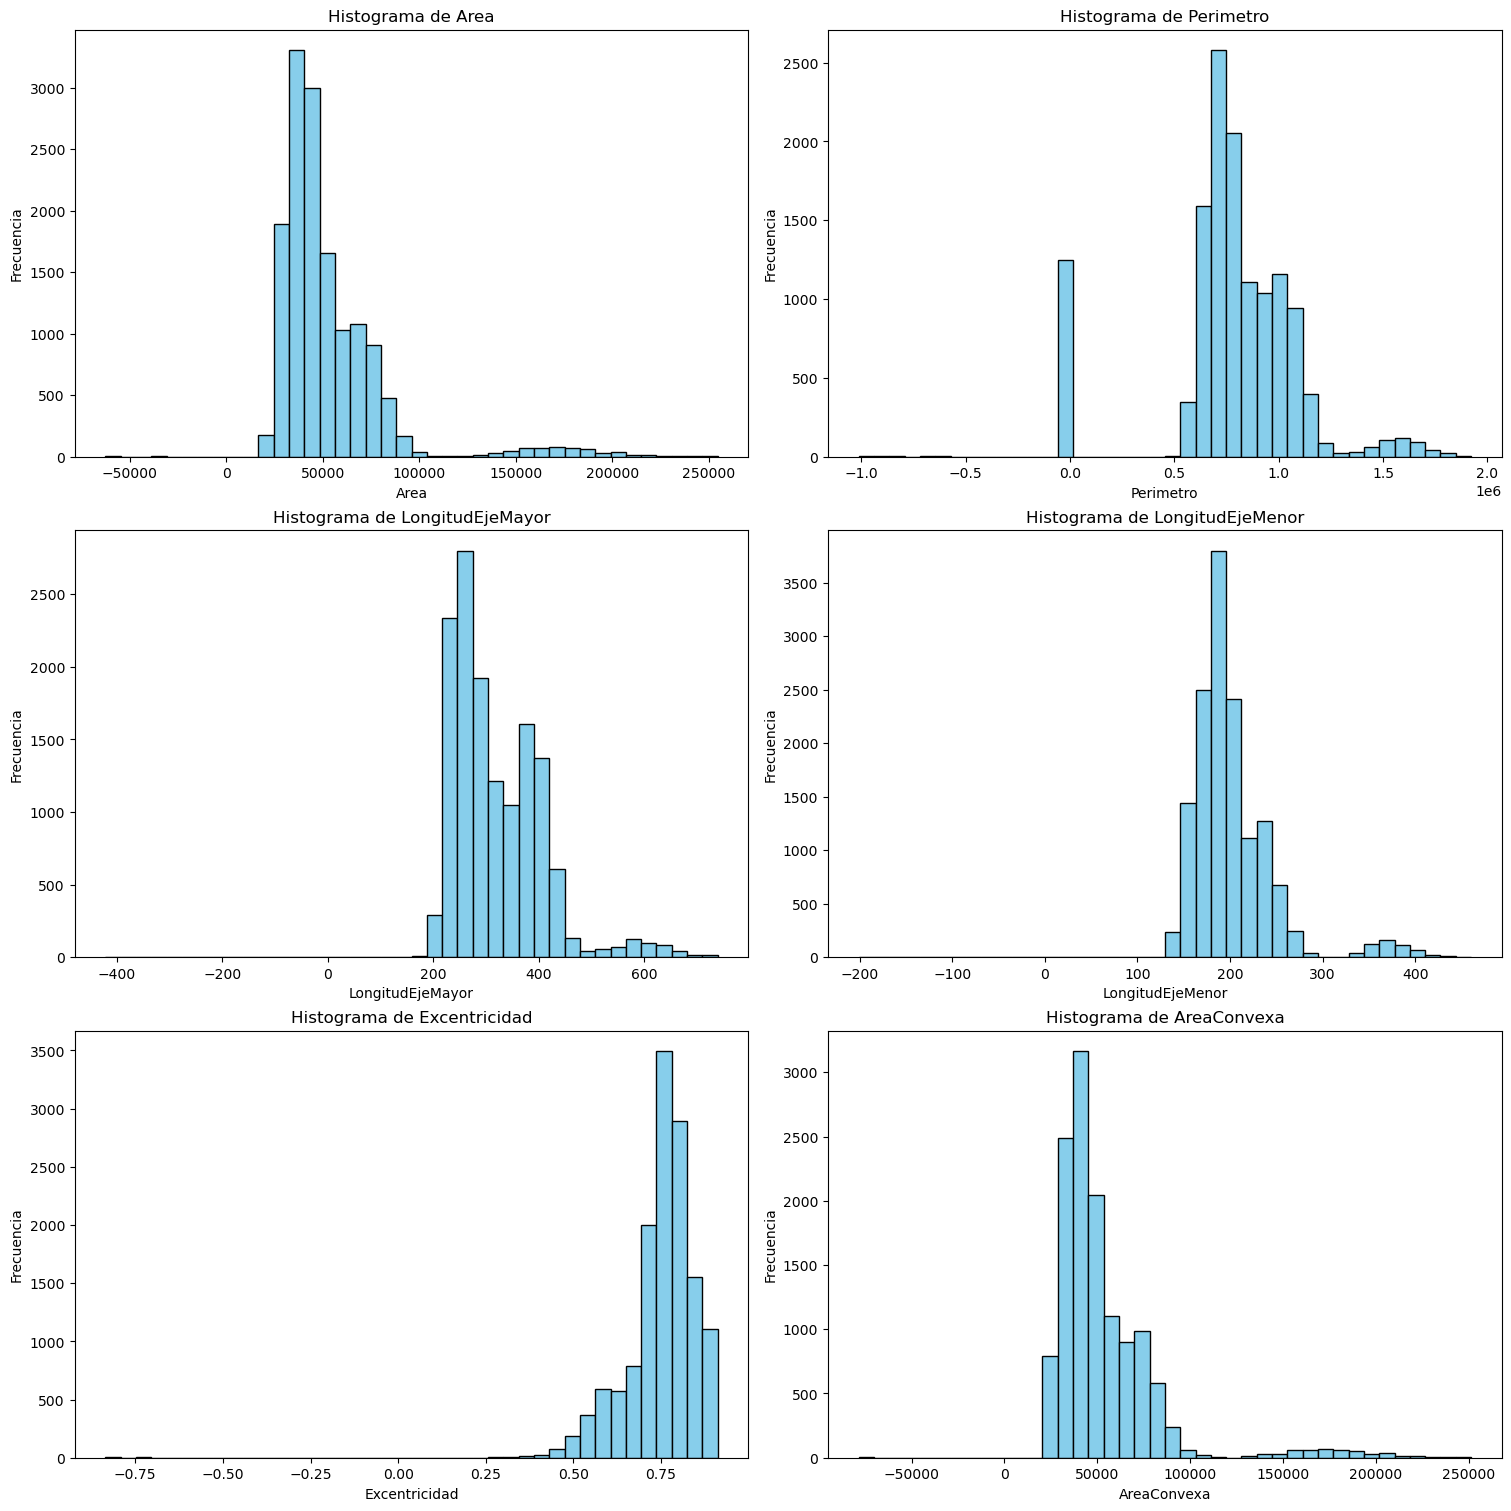

In [56]:
#Continuamos con algunas visualizaciones básicas para comprensión de ciertas variables del dataset
import matplotlib.pyplot as plt

columnas_graficar_1 = ['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'Excentricidad', 'AreaConvexa']

fig, ax = plt.subplots(3, 2, figsize=(15, 15), layout='constrained')

#Aqui enumerate() sirve para recorrer la lista y al mismo tiempo obtener un contador.
for i, columna in enumerate(columnas_graficar_1):
    indice_fila = i // 2 #Dice en que fila va a estar el histograma
    indice_columna = i % 2 #Dice en que columna va a estar el histograma

    #Graficamos por ahora sin los valores nulos para evitar errores
    ax[indice_fila, indice_columna].hist(datos_senecafe[columna].dropna(), bins=40, color='skyblue', edgecolor='black')
    ax[indice_fila, indice_columna].set_title("Histograma de " + columna)
    ax[indice_fila, indice_columna].set_xlabel(columna)
    ax[indice_fila, indice_columna].set_ylabel('Frecuencia')

plt.show()

Esto nos permite ver que, para las variables:

- **Área:** el tamaño ocupado por un grano de café suele estar entre 25000 y 75000 píxeles de la superficie, con algunos valores que superan los 200000, los cuales son outliers. Se observan también valores negativos, que no tienen sentido físico y deben revisarse.

- **Perímetro:** la longitud de un grano suele estar entre 0.6 y 1.3 millones de unidades. Aparecen valores cercanos a cero y negativos, que no son coherentes con esta medida, que es justamente no negativa.

- **LongitudEjeMayor:** la longitud del eje mayor de un grano suele estar entre 200 y 450 unidades, aunque existen valores mayores a 600 que representan posibles outliers.

- **LongitudEjeMenor:** la longitud del eje menor suele estar entre 150 y 250 unidades, con algunos casos mayores a 400, que son outliers. También se observan valores negativos que deben revisarse.

- **Excentricidad:** la mayoría de granos presentan un valor cercano a 0.75, lo que indica formas más alargadas que circulares. Los valores negativos detectados deben revisarse, pues no se menciona esta posibilidad en el diccionario de datos. Los valores menores a 0.5 son outliers.

- **ÁreaConvexa:** el área del polígono convexo más pequeño que encierra el grano suele estar entre 25000 y 100000 píxeles, con colas largas hacia valores mayores, que son outliers. También aparecen valores negativos que debemos revisar para un área.


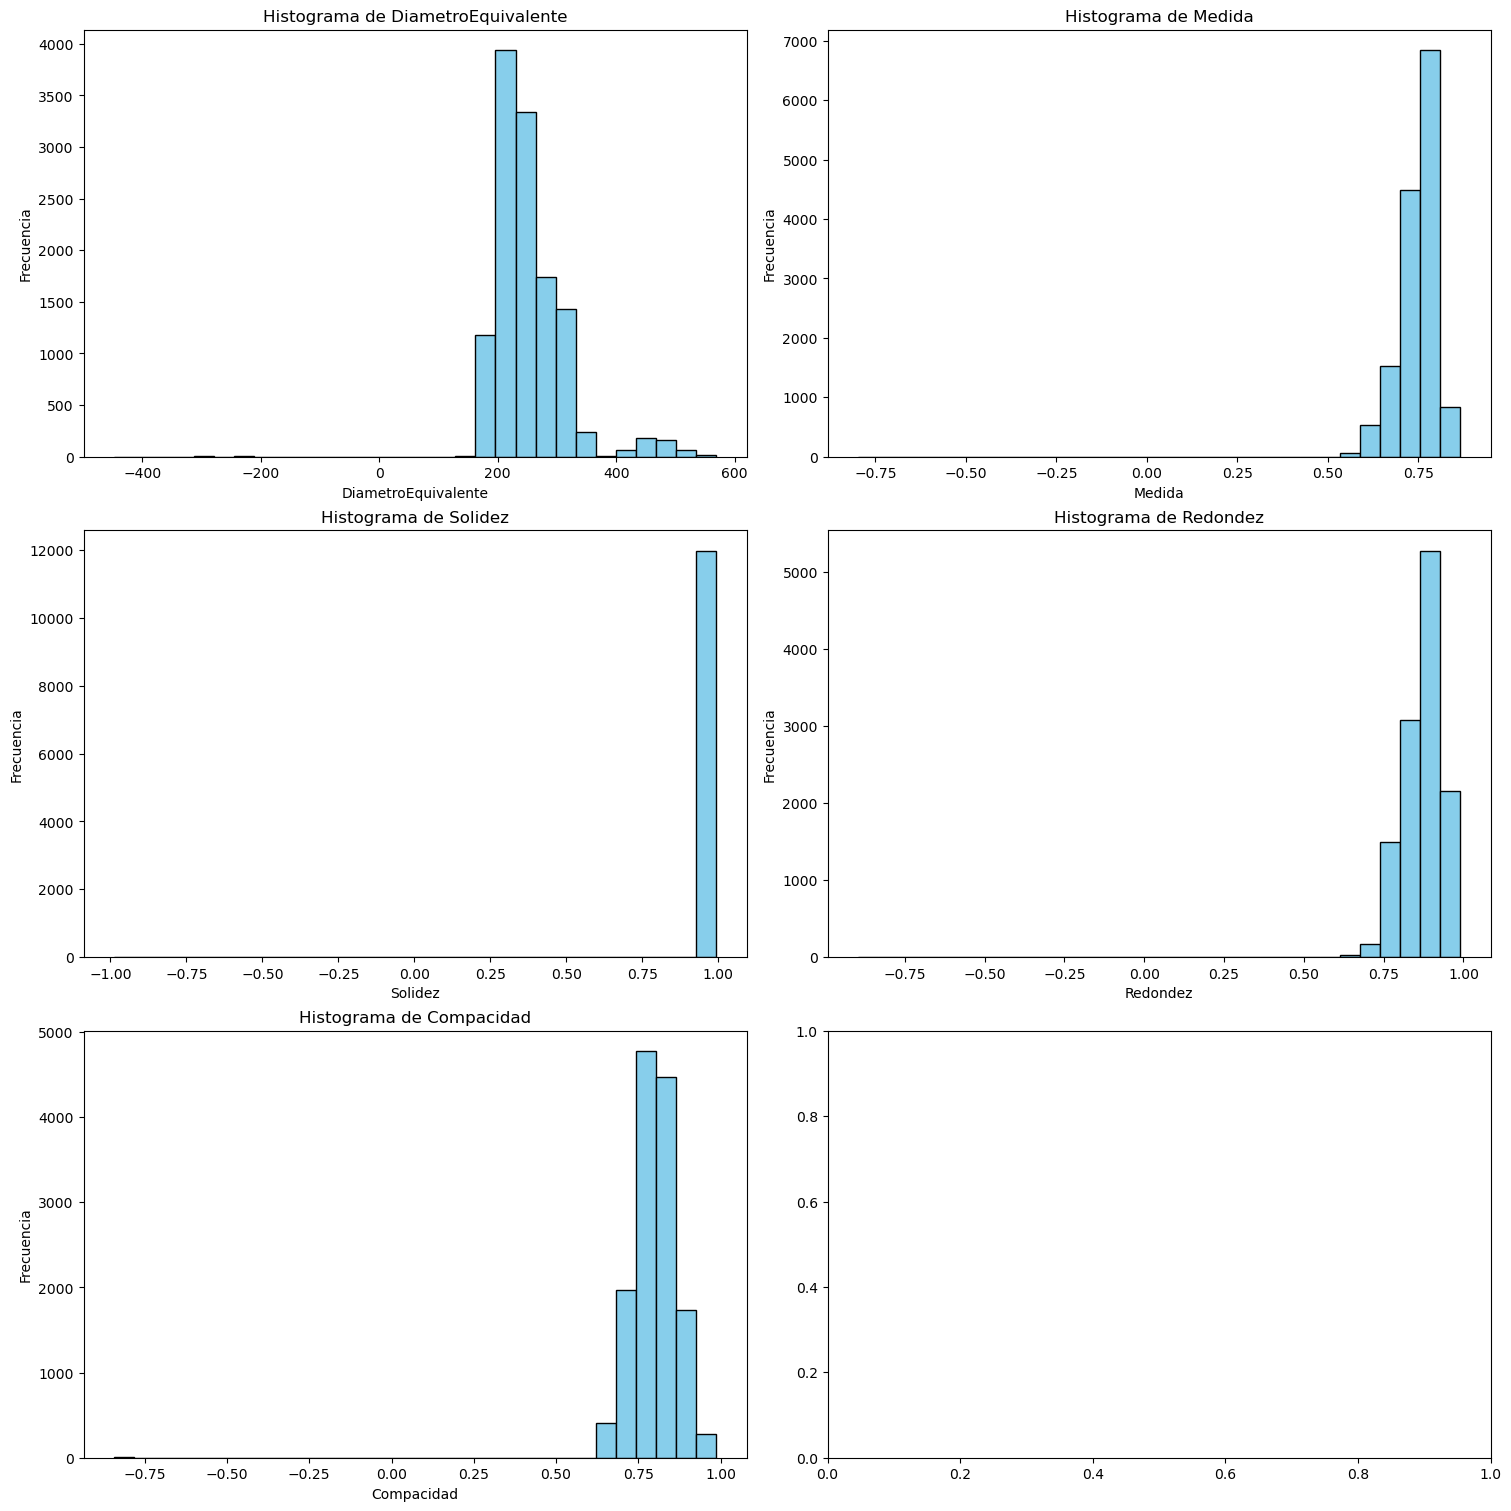

In [57]:
#Continuamos con algunas visualizaciones básicas para comprensión de ciertas variables del dataset

columnas_graficar_1 = ['DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad']  

fig, ax = plt.subplots(3, 2, figsize=(15, 15), layout='constrained')

#Aqui enumerate() sirve para recorrer la lista y al mismo tiempo obtener un contador.
for i, columna in enumerate(columnas_graficar_1):
    indice_fila = i // 2 #Dice en que fila va a estar el histograma
    indice_columna = i % 2 #Dice en que columna va a estar el histograma

    #Graficamos por ahora sin los valores nulos para evitar errores
    ax[indice_fila, indice_columna].hist(datos_senecafe[columna].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax[indice_fila, indice_columna].set_title("Histograma de " + columna)
    ax[indice_fila, indice_columna].set_xlabel(columna)
    ax[indice_fila, indice_columna].set_ylabel('Frecuencia')

plt.show()

Podemos observar que:

- **DiámetroEquivalente:** la mayoría de los granos se concentran entre 200 y 300 unidades, con una cola hacia valores mayores a 400. Aparecen también valores negativos, que no son físicamente posibles en una medida de diámetro.

- **Medida:** la mayoría de los granos tienen valores superiores a 0.7, lo que indica que el grano ocupa de forma adecuada el área de su espacio rectangular.

- **Solidez:** la distribución está muy concentrada en 1.0, lo cual significa que casi todos los granos son muy regulares en su forma.

- **Redondez:** los valores se concentran entre 0.75 y 1.0, lo que indica que la mayoría de los granos presentan formas muy cercanas a ser circulares. 

- **Compacidad:** los valores se concentran entre 0.75 y 0.9, lo que refleja granos compactos y cerca a ser redondeados. 

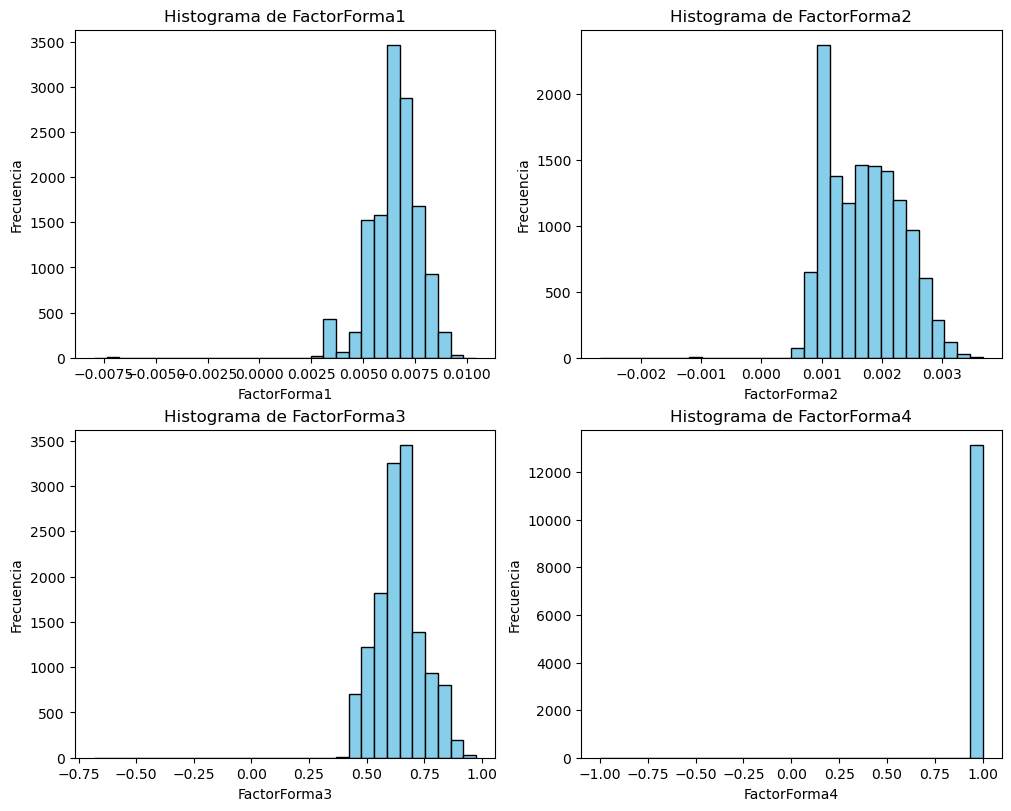

In [58]:
#Continuamos con algunas visualizaciones básicas para comprensión de ciertas variables del dataset
columnas_graficar_1 = ['FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']

fig, ax = plt.subplots(2, 2, figsize=(10, 8), layout='constrained')

#Aqui enumerate() sirve para recorrer la lista y al mismo tiempo obtener un contador.
for i, columna in enumerate(columnas_graficar_1):
    indice_fila = i // 2 #Dice en que fila va a estar el histograma
    indice_columna = i % 2 #Dice en que columna va a estar el histograma

    #Graficamos por ahora sin los valores nulos para evitar errores
    ax[indice_fila, indice_columna].hist(datos_senecafe[columna].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax[indice_fila, indice_columna].set_title("Histograma de " + columna)
    ax[indice_fila, indice_columna].set_xlabel(columna)
    ax[indice_fila, indice_columna].set_ylabel('Frecuencia')

plt.show()

Podemos observar lo siguiente: 

- **FactorForma1:** la mayoría de los valores se concentran entre 0.005 y 0.008. Aparecen valores negativos que son outliers.

- **FactorForma2:** los valores se concentran entre 0.001 y 0.003. Aparecen valores negativos que son outliers.

- **FactorForma3:** la mayoría de los granos se ubican con valores entre 0.5 y 0.8.

- **FactorForma4:** la distribución está concentrada en 1.0.

### Revisión de variables no numéricas

In [59]:
#Revisar el contenido de las variables que no son numéricas, en este caso son categóricas
datos_senecafe[lista_variables_texto].describe()

,ID,RelacionAspecto,DefectoVisible,MétodoSecado
count,14291,13825,11356,13704
unique,13611,4,2,6
top,G006149,Alargado,Normal,Lavado
freq,2,12047,9096,6260


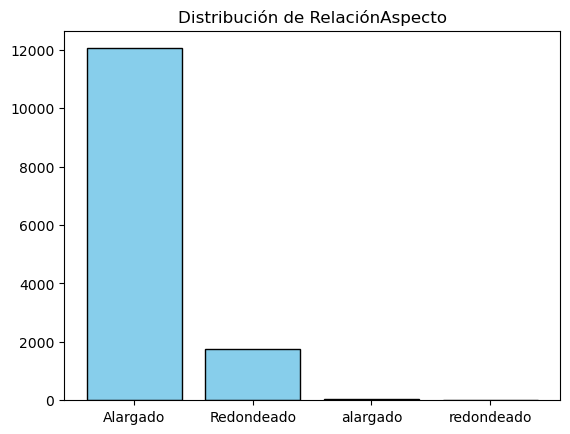

In [60]:
#Revisaremos las estadísticas descriptivas de variables que son texto

fig, ax = plt.subplots()

#Veamos las categorias
conteo = datos_senecafe["RelacionAspecto"].value_counts()

ax.bar(conteo.index, conteo.values, color='skyblue', edgecolor='black')

ax.set_title("Distribución de RelaciónAspecto")

plt.show()


Esto nos confirma que existen los valores alargado y redondeado, los cuales pueden unificarse con los respectivos Alargado y Redondeado. Además, la mayoría de granos son alargados.

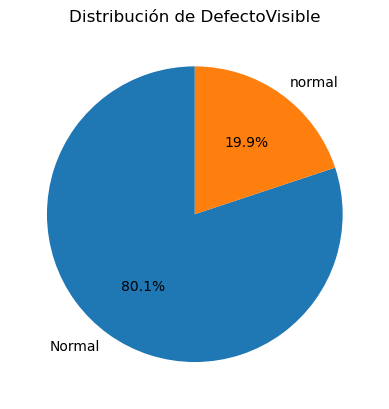

In [61]:
fig, ax = plt.subplots()

#Veamos las categorias
conteo = datos_senecafe["DefectoVisible"].value_counts()

ax.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%', startangle=90)

ax.set_title("Distribución de DefectoVisible")

plt.show()

Todos los granos de café tienen un defecto visible normal. Nuevamente, es importante recordar que normal es equivalente a Normal.

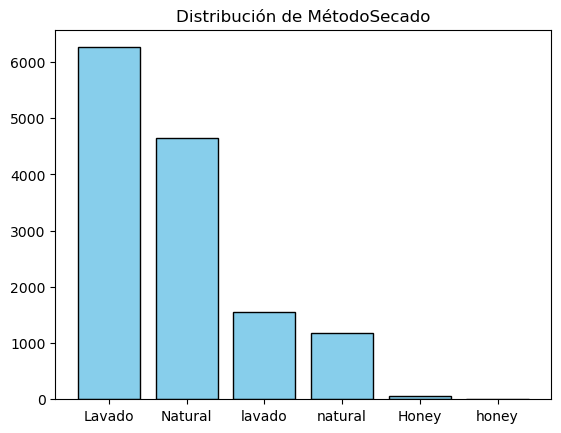

In [62]:
fig, ax = plt.subplots()

#Veamos las categorias
conteo = datos_senecafe["MétodoSecado"].value_counts()

ax.bar(conteo.index, conteo.values, color='skyblue', edgecolor='black')

ax.set_title("Distribución de MétodoSecado")

plt.show()

Nuevamente, se confirma que existen equivalencias, diferenciadas en los datos únicamente por mayúsculas, pero sin distinción en su significado práctico. La mayoría de granos de café tienen el método de procesamiento lavado.

### Descripción del entendimiento de datos 

Nos compartieron un dataset de entrenamiento con la información de 14291 granos de café, con sus determinadas características. Se identificaron 19 variables o columnas, de las cuales podemos llegar a la siguiente información:

1. Características geométricas básicas del grano: describen cómo es el espacio ocupado por el grano de café. Incluye variables como Área, Perímetro, Longitud del Eje Mayor, Longitud del Eje Menor, Área Convexa y Diámetro Equivalente, que describen directamente el tamaño y la forma física de cada grano.

2. Factores específicos del grano: reflejan qué tan alargado, compacto o circular es un grano, así como la estética general del mismo y lo diferencian e identifican de los demás granos. Incluye columnas como Relación de Aspecto, Excentricidad, Medida, Solidez, Redondez, Compacidad, ID, los Factores de Forma 1, 2, 3 y 4, Defecto Visible y Método de Secado

Además, identificamos:
- Tres variables categóricas: 'RelacionAspecto' (Alargado, Redondeado), 'DefectoVisible' (Normal, Defectuoso) y 'MetodoSecado' (Natural, Lavado, Honey). 

- Quince variables numéricas: 'Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor' 'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3' y 'FactorForma4. 

### Interpretación de visualización de variables categóricas:
- Las tres variables categóricas tienen categorías equivalentes, únicamente separadas por la manera en que se han escrito. Por ejemplo, Alargado es equivalente a alargado. La única diferencia radica en su escritura. 

- Los granos de café, según los diagramas realizados, suelen ser lavados, alargados y normales. 

### Interpretación de visualización y estadísticas de variables numéricas:
Gracias a las estadísticas descriptivas y los histogramas podemos ver que: 

- Algunas medidas, como perímetro, área o las longitudes de los ejes pueden tener valores negativos, o valores muy superiores (outliers, pues son pocos casos particulares).

- Variables como excentricidad, solidez, redondez y compacidad se distribuyen en los rangos esperados (cercanos a 0.7–1), aunque también se detectan registros negativos incoherentes.  

## 2. Análisis de calidad de los datos
Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.

### Completitud: revisar valores nulos

In [63]:
#Vemos cuántos nulos hay por columna
nulos = datos_senecafe.isnull().sum()

print("Cantidad de nulos por columna")
#Ordenamos los nulos de mayor a menor
nulos = nulos.sort_values(ascending=False)
display(nulos)

print("Porcentaje de nulos por columna")
# Cálculo de porcentaje de valores nulos por columna
(((nulos/datos_senecafe.shape[0]))* 100).sort_values(ascending=False) 

Cantidad de nulos por columna


DefectoVisible         2935
Solidez                2306
Redondez               2063
DiametroEquivalente    1923
AreaConvexa            1423
Perimetro              1237
FactorForma4           1159
FactorForma1           1119
FactorForma2           1106
Compacidad              650
Excentricidad           604
MétodoSecado            587
FactorForma3            478
RelacionAspecto         466
LongitudEjeMayor        401
ID                        0
Area                      0
LongitudEjeMenor          0
Medida                    0
dtype: int64

Porcentaje de nulos por columna


DefectoVisible         20.537401
Solidez                16.136030
Redondez               14.435659
DiametroEquivalente    13.456021
AreaConvexa             9.957316
Perimetro               8.655797
FactorForma4            8.109999
FactorForma1            7.830103
FactorForma2            7.739137
Compacidad              4.548317
Excentricidad           4.226436
MétodoSecado            4.107480
FactorForma3            3.344762
RelacionAspecto         3.260794
LongitudEjeMayor        2.805962
ID                      0.000000
Area                    0.000000
LongitudEjeMenor        0.000000
Medida                  0.000000
dtype: float64

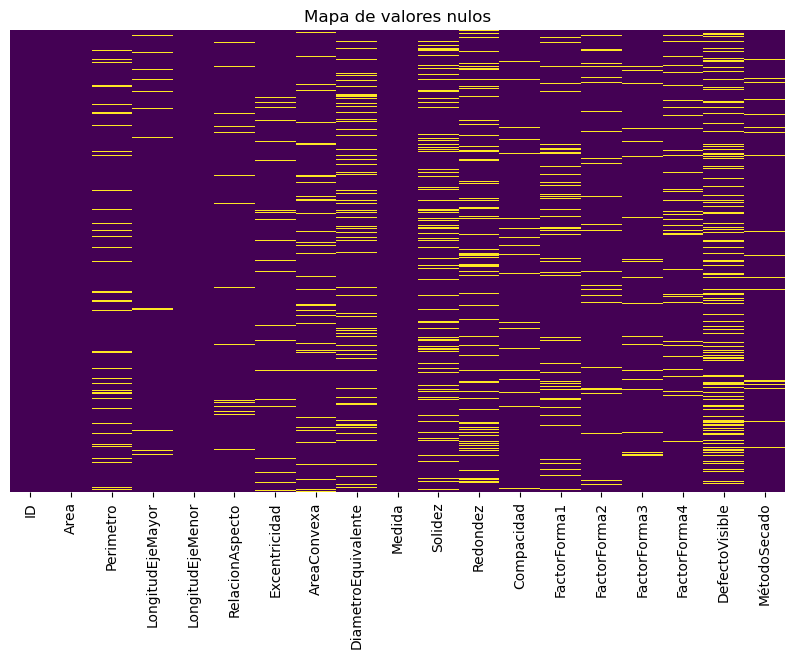

In [64]:
#Hacemos el mapa de valores nulos
#Los valores nulos se encuentran en amarillo.
import seaborn as sns 
plt.figure(figsize=(10, 6))
sns.heatmap(datos_senecafe.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de valores nulos')
plt.show()

Podemos observar que hay 15 columnas que contienen valores nulos, donde DefectoVisible es la que tiene mayor cantidad de nulos (20.53%, es decir, 2935 registros con esa variable nula), mientras que LongitudEjeMayor tiene la menor cantidad de nulos (3.26%, es decir, 401 registros con esa variable nula).

### Unicidad: revisar filas duplicadas

In [65]:
#Revisamos las filas duplicadas completas
num_duplicados = datos_senecafe.duplicated().sum()
print("Número de filas duplicadas completas:", num_duplicados)

#Revisamos las filas duplicadas parciales por Jugador, Posición y Día del partido
variables_para_duplicados = ['ID']

print("-----")
duplicados_parciales = datos_senecafe.duplicated(subset=variables_para_duplicados, keep=False)
num_duplicados_parciales = duplicados_parciales.sum()
print("Número de duplicados parciales (según ID del grano de café):", num_duplicados_parciales)

print("-----")
print("Ejemplo de un duplicado: ")

#Detectar IDs duplicados
ids_duplicados = datos_senecafe[datos_senecafe["ID"].duplicated()]["ID"].unique()

#Queremos, por ejemplo, ver todas las filas del primer ID duplicado
ejemplo = datos_senecafe[datos_senecafe["ID"] == ids_duplicados[0]]
display(ejemplo)

# Mostrar algunos ejemplos
print("-----")
print("Ejemplos de duplicados parciales:")
display(datos_senecafe[duplicados_parciales].head(10))


Número de filas duplicadas completas: 461
-----
Número de duplicados parciales (según ID del grano de café): 1360
-----
Ejemplo de un duplicado: 


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
126,G001698,44524,758387.0,258.916322,219.129976,Redondeado,NaN,44860.0,238.096026,0.782977,NaN,0.972797,0.919587,0.005815,0.002565,0.84564,0.999178,Normal,Lavado
384,G001698,44524,758387.0,258.916322,219.129976,Redondeado,NaN,44860.0,238.096026,0.782977,NaN,0.972797,0.919587,0.005815,0.002565,0.84564,0.999178,Normal,Lavado


-----
Ejemplos de duplicados parciales:


,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
16,G000100,33143,NaN,222.526309,189.737379,Redondeado,0.522480,33377.0,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,NaN,0.852195,NaN,Normal,NaN
20,G012961,36876,707667.0,261.019476,180.562424,Alargado,0.722129,37270.0,216.684059,0.716136,0.989428,0.925328,0.830145,0.007078,0.002074,0.689141,0.996216,Normal,Natural
27,G002040,46774,833722.0,305.703887,196.146061,Alargado,0.767022,47446.0,244.037920,0.793910,0.985837,0.845613,0.798282,0.006536,0.001637,0.637254,0.993194,normal,lavado
30,G009056,45954,795062.0,294.820672,199.020609,Alargado,0.737766,46398.0,241.889334,0.780296,0.990431,0.913548,0.820463,0.006416,0.001793,0.673159,0.997189,Normal,Lavado
37,G000534,36568,691529.0,241.392193,193.119305,Redondeado,0.599969,36883.0,215.777255,0.789669,0.991459,0.960927,0.893887,0.006601,0.002600,0.799033,0.998763,Normal,Lavado
39,G000863,38445,705779.0,235.182533,208.473973,Redondeado,0.462854,38763.0,221.245778,0.769670,NaN,0.969867,0.940741,NaN,0.002955,0.884993,0.998374,normal,lavado
40,G011077,29081,636593.0,237.301527,156.431380,Alargado,0.751959,29481.0,192.424217,0.703680,0.986432,0.901769,0.810885,0.008160,0.002176,0.657534,0.997459,Normal,Natural
44,G005640,42450,NaN,347.951525,156.469366,Alargado,0.893186,42820.0,232.484448,0.609388,NaN,0.777867,0.668152,0.008197,0.001008,0.446427,0.992750,Normal,Natural


Vemos que hay 461 registros duplicador por completo y 1360 duplicados parciales por ID del grano de café, que se supone es único (según el diccionario de datos). Además, se puede repetir varias veces el ID de un grano de café, por lo que podemos tener diferente información de un mismo grano de café. Este puede ser un duplicado parcial o total. Así, no hay unicidad total en el dataset por ahora, y debemos hacer manejo de esto para mantener coherencia sobre los granos y sus datos.

### Validez: revisar reglas de negocio, formatos y restricciones


In [66]:
#Algunas variables corresponden a medidas que físicamente no deberían ser negativas, hay que revisarlo
variables_no_negativas = ["Area", "Perimetro", "LongitudEjeMayor", "LongitudEjeMenor", "AreaConvexa", "DiametroEquivalente"]

#Algunas variables deberian estar entre 0 y 1, no tomar otros valores por definición
variables_rango_cero_uno = ["Excentricidad", "Medida", "Solidez", "Redondez", "Compacidad", "FactorForma1", "FactorForma2", "FactorForma3", "FactorForma4"]

print("Revisión de valores negativos\n")
#Revisamos las que deberian ser no negativas
for columna in variables_no_negativas:
    num_invalidos = (datos_senecafe[columna] < 0).sum()
    print(columna + ": " + str(num_invalidos) + " valores negativos")

print("-----")

print("Revisión de valores que deberían ser >0 y <1 \n")
#Revisamos las que deberian estar en rango
for columna in variables_rango_cero_uno:
    num_invalidos = ((datos_senecafe[columna] < 0) | (datos_senecafe[columna] > 1)).sum()
    print(columna + ": " + str(num_invalidos) + " valores fuera de rango")

Revisión de valores negativos

Area: 3 valores negativos
Perimetro: 6 valores negativos
LongitudEjeMayor: 3 valores negativos
LongitudEjeMenor: 4 valores negativos
AreaConvexa: 6 valores negativos
DiametroEquivalente: 7 valores negativos
-----
Revisión de valores que deberían ser >0 y <1 

Excentricidad: 9 valores fuera de rango
Medida: 1 valores fuera de rango
Solidez: 2 valores fuera de rango
Redondez: 2 valores fuera de rango
Compacidad: 4 valores fuera de rango
FactorForma1: 6 valores fuera de rango
FactorForma2: 7 valores fuera de rango
FactorForma3: 3 valores fuera de rango
FactorForma4: 5 valores fuera de rango


Confirmamos la existencia de valores negativos y fuera de rango para variables que no deberían tenerlos. 

In [67]:
#Nuevamente, veamos las opciones en las columnas categóricas
print("Valores únicos en RelacionAspecto:", datos_senecafe["RelacionAspecto"].unique())
print("Valores únicos en DefectoVisible:", datos_senecafe["DefectoVisible"].unique())
print("Valores únicos en MétodoSecado:", datos_senecafe["MétodoSecado"].unique())

Valores únicos en RelacionAspecto: ['alargado' 'Alargado' 'Redondeado' 'redondeado' nan]
Valores únicos en DefectoVisible: ['Normal' nan 'normal']
Valores únicos en MétodoSecado: ['Lavado' 'Natural' 'lavado' nan 'natural' 'Honey' 'honey']


Hay valores equivalentes para una misma categoría, diferenciados por la ortografía. Hay que tratarlo más adelante.

In [68]:
#Los ID deberían ser únicos
print("IDs únicos:", datos_senecafe["ID"].nunique())
print("Total de filas:", len(datos_senecafe))

IDs únicos: 13611
Total de filas: 14291


Aunque deberíamos tener 14291 filas con 14291 IDs únicos, tenemos tan solo 13611 IDs únicos. Hay que manejarlo más adelante. Esto lo habíamos visto previamente en unicidad también.

### Consistencia: revisar incoherencias entre datos

In [69]:
#En teoría, el Area debería ser menor o igual al Área convexa, que cubre el área del grano
inconsistencias_area = (datos_senecafe["Area"] > datos_senecafe["AreaConvexa"]).sum()
print("Filas con Área mayor que ÁreaConvexa:", inconsistencias_area)

Filas con Área mayor que ÁreaConvexa: 6


Aunque se supone que el Área convexa es igual o mayor al Área, hay algunos casos que no cumplen con esta definición. Hay que tratarlos.

## 3. Enfoque analítico

Se solicita la aplicación de técnicas de agrupación para identificar patrones morfológicos que permitan caracterizar las distintas variedades de café. Así:

- **Tipo de analítica**: FALTA PONERLA!!!

- **Tipo de aprendizaje**: No supervisado, ya que trabajamos con un conjunto de datos de granos sin etiquetas o categorías predefinidas para ellos. Los modelos van a buscar patrones sin decirles de antemano qué clases de grano existen o cuántos tipos de patrón hay para ellos.

- **Tipo de tarea supervisada**: Clustering o Agrupación por Similitud, porque el objetivo es detectar grupos naturales de granos morfológicamente similares. No clasificamos en clases previamente definidas, y no estimamos un valor.

## 4. Preselección de variables

Por el momento, podemos decir que la variable ID no resulta útil para reconocer patrones y hacer clustering de los granos, ya que corresponde únicamente a un identificador interno y no aporta información morfológica.

## 5. Preparación y limpieza de los datos

### Manejo de duplicados completos

Dejaremos solo un registro único

In [70]:
#Contamos registros duplicados completos
duplicados = datos_senecafe.duplicated().sum()
print("Número de filas duplicadas:", duplicados)

#Eliminamos duplicados, dejamos solo uno
datos_senecafe = datos_senecafe.drop_duplicates()

#Verificamos de nuevo
print("Número de filas duplicadas después de eliminar duplicados completos:", datos_senecafe.duplicated().sum())
print("Cantidad de filas finales:", datos_senecafe.shape[0])

Número de filas duplicadas: 461
Número de filas duplicadas después de eliminar duplicados completos: 0
Cantidad de filas finales: 13830


### Manejo de duplicados parciales (IDs repetidos)

Elegimos dejar la primera aparición de un grano de café para que, en efecto, los ID sean únicos

In [71]:
#Contar IDs duplicados parciales por ID despues de borrar duplicados completos
duplicados_id = datos_senecafe['ID'].duplicated().sum()
print("Duplicados según ID encontrados:", duplicados_id)

#Dejamos el primer registro
datos_senecafe = datos_senecafe.drop_duplicates(subset=['ID'], keep='first')

print("Cantidad de filas después de limpiar duplicados por ID:", datos_senecafe.shape[0])


Duplicados según ID encontrados: 219
Cantidad de filas después de limpiar duplicados por ID: 13611


### Manejo de nulos

Variables numéricas con pocos valores nulos (menos del 15% de los registros totales o datos), como LongitudEjeMayor, DiámetroEquivalente, ÁreaConvexa, Perímetro, FactorForma1, FactorForma2, FactorForma3, FactorForma4, Excentricidad y Compacidad, así como variables categóricas como RelacionAspecto y MétodoSecado , permiten aplicar imputación en lugar de eliminar registros.

Dado que el dataset cuenta con 13.611 observaciones, la proporción de nulos es baja, lo que hace viable imputar sin comprometer de manera significativa la calidad de los datos. Esta estrategia evita la pérdida de registros y reduce el riesgo de distorsionar los resultados del análisis.

In [72]:
#Imputación con mediana o promedio para las variables numéricas
num_cols = ['LongitudEjeMayor', 'Excentricidad', 'Compacidad', 'FactorForma3', 
'DiametroEquivalente', 'AreaConvexa', 'Perimetro', 'FactorForma1', 'FactorForma2', 'FactorForma4']

print("Nulos en numéricas antes de imputar:")
print(datos_senecafe[num_cols].isna().sum())
print("")

for col in num_cols:
    datos_senecafe[col] = datos_senecafe[col].fillna(datos_senecafe[col].median())

print("Nulos en numéricas después de imputar:")
print(datos_senecafe[num_cols].isna().sum())

Nulos en numéricas antes de imputar:
LongitudEjeMayor        385
Excentricidad           564
Compacidad              627
FactorForma3            455
DiametroEquivalente    1825
AreaConvexa            1365
Perimetro              1182
FactorForma1           1069
FactorForma2           1039
FactorForma4           1104
dtype: int64

Nulos en numéricas después de imputar:
LongitudEjeMayor       0
Excentricidad          0
Compacidad             0
FactorForma3           0
DiametroEquivalente    0
AreaConvexa            0
Perimetro              0
FactorForma1           0
FactorForma2           0
FactorForma4           0
dtype: int64


In [73]:
#Imputación con moda para variables categóricas
cat_cols = ['MétodoSecado']

print("\nNulos en categóricas antes de imputar:")
print(datos_senecafe[cat_cols].isna().sum())

for col in cat_cols:
    moda = datos_senecafe[col].mode()[0]
    datos_senecafe[col] = datos_senecafe[col].fillna(moda)


print("\nNulos en categóricas después de imputar:")
print(datos_senecafe[cat_cols].isna().sum())


Nulos en categóricas antes de imputar:
MétodoSecado    558
dtype: int64

Nulos en categóricas después de imputar:
MétodoSecado    0
dtype: int64


Ahora, variables como RelacionAspecto, Redondez y Solidez se pueden derivar calculándolas mediante otras variables que son o ya conocidas, o han sido imputadas.

In [74]:
mas_nulos_cols = ['Solidez', 'Redondez']
print(datos_senecafe[mas_nulos_cols].isna().sum())

Solidez     2185
Redondez    1976
dtype: int64


In [75]:
#Revisar nulos antes
print("Nulos en RelacionAspecto antes de derivar:", datos_senecafe['Solidez'].isna().sum())
print("Nulos en Solidez antes de derivar:", datos_senecafe['Solidez'].isna().sum())
print("Nulos en Redondez antes de derivar:", datos_senecafe['Redondez'].isna().sum())

#Calcular RelacionAspecto_num solo para nulos
datos_senecafe.loc[datos_senecafe["RelacionAspecto"].isna(), "RelacionAspecto_num"] = (
    datos_senecafe["LongitudEjeMayor"] / datos_senecafe["LongitudEjeMenor"]
)

#Clasificación alargado/redondeado, pero solo en nulos
datos_senecafe.loc[datos_senecafe["RelacionAspecto"].isna(), "RelacionAspecto"] = (
    datos_senecafe["RelacionAspecto_num"]
    .apply(lambda x: "alargado" if x > 1.3 else "redondeado")
)

#Calcular Solidez solo donde haya nulos
datos_senecafe.loc[datos_senecafe["Solidez"].isna(), "Solidez"] = (
    datos_senecafe["Area"] / datos_senecafe["AreaConvexa"]
)

#Calcular Redondez solo donde haya nulos
datos_senecafe.loc[datos_senecafe["Redondez"].isna(), "Redondez"] = (
    (4 * np.pi * datos_senecafe["Area"]) / (datos_senecafe["Perimetro"]**2)
)

#Revisar nulos después
print("Nulos en Solidez después de derivar:", datos_senecafe['Solidez'].isna().sum())
print("Nulos en Redondez después de derivar:", datos_senecafe['Redondez'].isna().sum())

Nulos en RelacionAspecto antes de derivar: 2185
Nulos en Solidez antes de derivar: 2185
Nulos en Redondez antes de derivar: 1976
Nulos en Solidez después de derivar: 0
Nulos en Redondez después de derivar: 0


Finalmente, se encuentra la variable DefectoVisible: 

- DefectoVisible tiene más del 15% de registros del dataset con valores nulos en esta columna. Adempas, no es una variable que ayude al objetivo del clustering, que es ver patrones en la caracterización morfológica de un grano; en cambio, es más una etiqueta de calidad hecha al ojo, pues en el diccionario de datos se menciona que permite diferenciar entre granos sanos normales y granos con defectos visibles (Normal, Defectuoso). Esto se puede obviar, pues eventualmente podrá concentrarse en características más precisas. De esta forma, la decisión es eliminar esta columna o variable.

In [76]:
#Eliminamos la columna DefectoVisible
datos_senecafe = datos_senecafe.drop(columns=['DefectoVisible'])

#Verificamos que en efecto ya no esté en el dataset
print(datos_senecafe.columns)

datos_senecafe.info()

Index(['ID', 'Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor',
       'RelacionAspecto', 'Excentricidad', 'AreaConvexa',
       'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad',
       'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4',
       'MétodoSecado', 'RelacionAspecto_num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 13611 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13611 non-null  object 
 1   Area                 13611 non-null  int64  
 2   Perimetro            13611 non-null  float64
 3   LongitudEjeMayor     13611 non-null  float64
 4   LongitudEjeMenor     13611 non-null  float64
 5   RelacionAspecto      13611 non-null  object 
 6   Excentricidad        13611 non-null  float64
 7   AreaConvexa          13611 non-null  float64
 8   DiametroEquivalente  13611 non-null  float

### Manejo de valores negativos

En vista de que los registros con valores negativos en columnas que no deberían admitirlo son pocos en comparación con el total de registros, podemos borrar los registros con esta condición e igual tener un número considerable de registros.

In [77]:
#Antes
print("Filas antes:", datos_senecafe.shape[0])

#Filtrar las validas
datos_senecafe = datos_senecafe[(datos_senecafe[variables_no_negativas] >= 0).all(axis=1)]

#Después
print("Filas después:", datos_senecafe.shape[0])

Filas antes: 13611
Filas después: 13585


### Manejo de Outliers

Dado que la existencia de Outliers pueden distorsionar las distancias y generar ruido dentro dentro de los modelos, procederemos a eliminarlos por medio de la regla del rango intercuatilico (IQR), es decir el tamaño del rango donde se encuentran el 50% de los datos (Definido a través de la diferencia entre el tercer y primer cuartil). Este metodo permite encontrar a los datos que estan demasiado lejos del rango central de datos 

In [78]:
# Identificar y eliminar outliers usando el método IQR (Interquartile Range)
print("Dimensiones originales del dataset:", datos_senecafe.shape)

# Crear una copia del dataframe para trabajar
datos_sin_outliers = datos_senecafe.copy()
filas_originales = datos_sin_outliers.shape[0]

# Aplicar el método IQR a cada variable numérica
for columna in lista_variables_numero:
    # Saltamos si la columna tiene valores nulos
    if datos_sin_outliers[columna].isna().sum() > 0:
        continue
        
    # Calculamos Q1 y Q3
    Q1 = datos_sin_outliers[columna].quantile(0.25)
    Q3 = datos_sin_outliers[columna].quantile(0.75)
    
    # Calculamos el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definimos los límites para considerar outliers (usando 1.5*IQR)
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Filtramos los outliers
    datos_sin_outliers = datos_sin_outliers[
        (datos_sin_outliers[columna] >= limite_inferior) | 
        (datos_sin_outliers[columna].isna()) &
        (datos_sin_outliers[columna] <= limite_superior) | 
        (datos_sin_outliers[columna].isna())
    ]

filas_finales = datos_sin_outliers.shape[0]
filas_eliminadas = filas_originales - filas_finales

print(f"Se eliminaron {filas_eliminadas} filas con outliers")
print(f"Dimensiones después de eliminar outliers: {datos_sin_outliers.shape}")

# Reemplazamos el dataframe original con el limpio
datos_senecafe = datos_sin_outliers

Dimensiones originales del dataset: (13585, 19)
Se eliminaron 5537 filas con outliers
Dimensiones después de eliminar outliers: (8048, 19)


### Manejo de valores fuera del rango válido [0,1]

Los registros con valores fuera del rango en columnas que no deberían admitirlo son pocos en comparación con el total de registros, podemos borrar los registros con esta condición e igual tener un número considerable de registros.

In [79]:
#Antes
print("Filas antes:", datos_senecafe.shape[0])

#Filtrar las validas
datos_senecafe = datos_senecafe[(datos_senecafe[variables_rango_cero_uno] >= 0).all(axis=1) &
                                (datos_senecafe[variables_rango_cero_uno] <= 1).all(axis=1)]

#Después
print("Filas después:", datos_senecafe.shape[0])

Filas antes: 8048
Filas después: 7992


### Manejo de registros que no cumplen con Area <= al Área convexa

Los registros con valores inconsistentes en columnas que no deberían admitirlo son pocos en comparación con el total de registros, podemos borrar los registros con esta condición e igual tener un número considerable de registros.

In [80]:
# Filtrar solo las filas válidas: Área <= ÁreaConvexa
print("Filas antes de filtrar válidos:", datos_senecafe.shape[0])

datos_senecafe = datos_senecafe[datos_senecafe['Area'] <= datos_senecafe['AreaConvexa']]

print("Filas después de filtrar válidos:", datos_senecafe.shape[0])

Filas antes de filtrar válidos: 7992
Filas después de filtrar válidos: 7695


Los registros con esta inconsistencia fueron eliminados con los filtros anteriores.

### Mapeo de minúsculas y mayúsculas

In [81]:
columnas_categoricas = ["MétodoSecado", "RelacionAspecto"]

#Convertir a minúsculas y quitar espacios extra
for columna in columnas_categoricas:
    datos_senecafe[columna] = datos_senecafe[columna].str.strip().str.lower()

#Verificar valores únicos de cada categórica
for columna in columnas_categoricas:
    print("Columna", columna)
    print(datos_senecafe[columna].unique())

Columna MétodoSecado
['natural' 'lavado' 'honey']
Columna RelacionAspecto
['alargado' 'redondeado']


#### Preselección de variables: Iteración
El objetivo es identificar patrones morfológicos, es decir relacionados a la forma de las semillas de café, que se puede describir a partir de variables de forma, tamaño o, en general de su físico. Por ello:

* ID: hemos mencionado que no es útil para la agrupación, ya que solo identifica a cada semilla, sin aportar a la descripción de su morfología. 

* MetodoSecado: no es útil para la agrupación, puesto que describe el proceso o método de la postcosecha (acorde con el diccionario de datos), sin aportar a la descripción de su morfología.  

* RelacionAspecto y RelacionAspecto_num: no es útil para la agrupación, ya que según el idccionario de datos es la razón LongitudEjeMayor / LongitudEjeMenor. Así, podemos trabajar con esas variables de por sí en los modelos a construir, sin omitir información relevante.

De ese modo, podemos eliminarlas:

In [82]:
columnas_eliminar = ["ID", "MétodoSecado", "RelacionAspecto", "RelacionAspecto_num"]

print("Columnas antes:", datos_senecafe.shape[1])

datos_senecafe = datos_senecafe.drop(columns=columnas_eliminar)

print("Columnas después:", datos_senecafe.shape[1])

Columnas antes: 19
Columnas después: 15


In [83]:
datos_senecafe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7695 entries, 2 to 14289
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 7695 non-null   int64  
 1   Perimetro            7695 non-null   float64
 2   LongitudEjeMayor     7695 non-null   float64
 3   LongitudEjeMenor     7695 non-null   float64
 4   Excentricidad        7695 non-null   float64
 5   AreaConvexa          7695 non-null   float64
 6   DiametroEquivalente  7695 non-null   float64
 7   Medida               7695 non-null   float64
 8   Solidez              7695 non-null   float64
 9   Redondez             7695 non-null   float64
 10  Compacidad           7695 non-null   float64
 11  FactorForma1         7695 non-null   float64
 12  FactorForma2         7695 non-null   float64
 13  FactorForma3         7695 non-null   float64
 14  FactorForma4         7695 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 961

### Normalización

En algoritmos de agrupación, como k-means, se miden distancias entre puntos. Es muy importante recordar que si una variable tiene valores muy grandes, y otra valores muy pequeños, la distancia se ve dominada por la variable con valores grandes, casi ignorando la de valores pequeños. Por eso, se hace necesario aplicar estandarización o normalización.

Elegimos usar normalización MinMax, que transforma cada variable para que sus valores queden dentro del rango [0,1]. En este caso, resulta útil porque tenemos variables con escalas muy diferentes. Por ejemplo, la excentricidad se mide en decimales, pues sus valores están entre 0 y 1; mientras que el área puede alcanzar valores de hasta 254616 unidades cuadradas. 

Con la normalización MinMax, todas las variables quedan en la misma escala sin modificar la forma de sus distribuciones, lo cual mejora que se puedan comparar y ayuda a los algoritmos a ser más efectivos.


In [84]:
from sklearn.preprocessing import MinMaxScaler

#Objeto para que podamos escalar
scaler = MinMaxScaler()

#Aplicamos normalizacion minmax sobre el dataset (hay que convertirlo en dataframe porque da un ndarray)
minmax_senecafe = pd.DataFrame(
    scaler.fit_transform(datos_senecafe.select_dtypes(include=[np.number])),
    columns=datos_senecafe.select_dtypes(include=[np.number]).columns
)

print("Datos normalizados (primeras filas):")
display(minmax_senecafe.head())

Datos normalizados (primeras filas):


,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
0,0.195173,0.363164,0.413280,0.253645,0.908245,0.196028,0.347246,0.214999,0.380789,0.347148,0.105462,0.365822,0.119457,0.102630,0.163749
1,0.093300,0.164694,0.158723,0.230818,0.330531,0.092951,0.188656,0.682120,0.677504,0.786935,0.599646,0.395787,0.562992,0.564339,0.795450
2,0.149219,0.274699,0.349213,0.197979,0.910159,0.148958,0.279781,0.105318,0.630240,0.527860,0.108041,0.456060,0.155191,0.388571,0.557413
3,0.112213,0.197761,0.212544,0.230041,0.589887,0.112868,0.220791,0.599632,0.367900,0.733637,0.453558,0.400157,0.378319,0.419101,0.513934
4,0.125721,0.191063,0.293995,0.185988,0.589887,0.126532,0.242877,0.208662,0.336175,0.535775,0.184850,0.477408,0.219868,0.171136,0.667394


Efectivamente, ahora los datos se encuentran en el rango [0,1]

## 6. Selección de variables

### Mapa de correlación

Hemos decidido ver el mapa de correlación de las variables para evitar que dos variables aporten prácticamenta la misma información al modelo al estar altamente correlacionadas. Si las mantenemos, podría inflarse la importancia de ciertos factores y cambiar el proceso de agrupamiento. 

Por ello, hemos decidido eliminar las variables con correlación alta y solo conservar una de ellas, así mantenemos la información esencial para que los modelos logren tener mayor eficiencia.

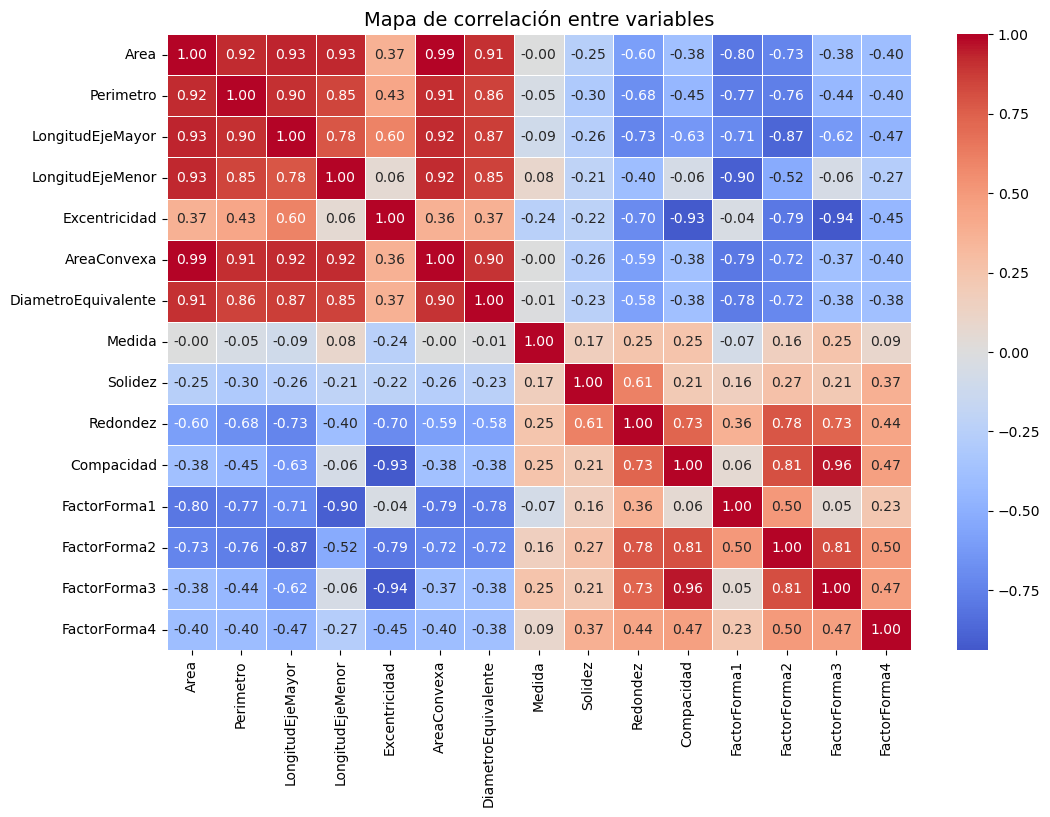

In [85]:
#Calcular la matriz de correlación 
corr = minmax_senecafe.corr()

plt.figure(figsize=(12,8))

#Veamosla con mapa de calor para entender mejor
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Mapa de correlación entre variables", fontsize=14)
plt.show()


In [86]:
#Ahora, eliminemos las variables más correlacionadas

#Matriz de correlación absoluta
correlacion = minmax_senecafe.corr().abs()

#Revisamos solo la parte superior de la matriz (para no duplicar)
parte_superior_matriz = correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(bool))

# Variables a eliminar (umbral de 0.90)
columnas_a_eliminar = [columna for columna in parte_superior_matriz.columns if any(parte_superior_matriz[columna] > 0.90)]

# Dataset reducido
senecafe_reducido= minmax_senecafe.drop(columns=columnas_a_eliminar).copy()

print("Columnas eliminadas por correlación:", columnas_a_eliminar)
print("Dimensiones del dataset reducido:", senecafe_reducido.shape)

Columnas eliminadas por correlación: ['Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'AreaConvexa', 'DiametroEquivalente', 'Compacidad', 'FactorForma1', 'FactorForma3']
Dimensiones del dataset reducido: (7695, 7)


In [87]:
senecafe_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           7695 non-null   float64
 1   Excentricidad  7695 non-null   float64
 2   Medida         7695 non-null   float64
 3   Solidez        7695 non-null   float64
 4   Redondez       7695 non-null   float64
 5   FactorForma2   7695 non-null   float64
 6   FactorForma4   7695 non-null   float64
dtypes: float64(7)
memory usage: 420.9 KB


## 7. Modelamiento

### 7.1. Implementación de K-means (Ana María Hernández)

Primero, hay que entender que K-means divide a los datos en k grupos, buscando que los elementos dentro de un mismo grupo sean lo más parecidos posibles entre sí, y lo más diferentes posible respecto a los de otros grupos. Para lograrlo, el algoritmo define un centroide para cada cluster (o grupo) y asigna cada observación al centroide más cercano según la distancia.

**Pasos de k-means**
1. Primero, se seleccionan los centroides iniciales de los *k* grupos.   
2. Después, cada punto del conjunto de datos (conformado por las variables que hemos elegido) calcula su distancia a cada centroide y se asigna al grupo cuyo centroide esté más cercano.   
3. Luego, se recalculan los centroides tomando el promedio de todos los puntos que quedaron en cada grupo.   
4. Itera y acaba cuando los centroides dejan de cambiar o cuando alcanza el número máximo de iteraciones. 

**Decisiones de implementación**

Recapitulemos las decisiones de implementación hechas hasta el momento para implementar k-means:

1. **Normalización de variables**: Se utilizó MinMaxScaler, que transforma cada variable al rango [0,1] (normaliza). Esta decisión se tomó porque el dataset incluía variables en escalas muy diferentes y podía inflar artificialmente algunos factores. 

2. **Reducción de variables por correlación**: Se eliminaron aquellas con correlación superior a 0.90, con el fin de evitar redundancia y mejorar la eficiencia. Con esto, el dataset pasó de 15 a 7 variables, pero manteniendo la información esencial (no hubo repetición innecesaria).

**Hiperparámetros**

Entendamos por qué se usaron estos hiperparámetros:

- **init**: `"k-means++"`, ayuda a buscar e inicializar con centroides dispersos, así mejora la eficiencia del algoritmo.

- **max_iter**: `300`, da el máximo de iteraciones máximas para llegar a los k grupos, así se asegura que el modelo tenga tiempo suficiente para converger sin alargar excesivamente el cálculo e iterar sin necesidad. Es el valor recomendado por defecto en sklearn.

- **n_init**: `"auto"`, hace que se ejecute k-means varias veces con diferentes centroides al inicial y poder elegir la mejor solución entre las ejecuciones.

- **n_clusters**: `Automático`, pues ayuda a buscar el mejor número de grupos o clusters k a formar.

- **random_state**: `30`, porque como K-means elige centroides al azar al inicio, random_state hace que siempre se usen los mismos centroides, así entre ejecuciones no cambian los resultados. Se puede poner cualquier número porque no afecta el algoritmo en sí, aunque por convención se usa el 42.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

#Hay que hacer una función para probar varios valores de k en k-means
def evaluar_kmeans(X, posibles_k=range(2, 13)):
    resultados = []

    #Iteramos sobre los valores de k para ver diferentes números de clusters
    for k in posibles_k:
        km = KMeans(
            n_clusters=k,
            init="k-means++",
            n_init="auto",       
            max_iter=300,
            random_state=42
        )

        #Obtenemos las etiquetas de cluster (números de grupo que se le dan a cada una de las observaciones o registros)
        labels = km.fit_predict(X)
        
        #Calculamos las métricas para luego validar
        sil = silhouette_score(X, labels)
        cal = calinski_harabasz_score(X, labels)
        dav = davies_bouldin_score(X, labels)
        
        resultados.append((k, sil, cal, dav))
    
    return pd.DataFrame(resultados, columns=["k", "silhouette", "calinski", "davies"])


resumen = evaluar_kmeans(senecafe_reducido)
display(resumen)

     k  silhouette     calinski    davies
0    2    0.314662  4271.248198  1.280336
1    3    0.281473  2829.821279  1.702657
2    4    0.218132  2677.894817  1.522219
3    5    0.233092  2533.006227  1.425892
4    6    0.216399  2378.962328  1.460057
5    7    0.225612  2350.111281  1.357720
6    8    0.222528  2207.028714  1.313402
7    9    0.206767  2095.868394  1.325731
8   10    0.202728  1994.967361  1.344816
9   11    0.198014  1894.821099  1.386587
10  12    0.194758  1809.946469  1.402831


Como podemos ver, el mejor k según silhouette es 2. Es decir, cuando se generan 2 grupos o clusters. 

**Hiperparámetros**

Así, añadimos el hiperparámetro

- **n_clusters**: `2`, ya que con este número de clusters obtenemos mejores resultados.

In [89]:
#Modelo final con k=2

kmeans_final = KMeans(
    n_clusters=2,
    init="k-means++",
    n_init=10,
    max_iter=300,
    random_state=42
)

labels_final = kmeans_final.fit_predict(senecafe_reducido)

#Veamos como es cada cluster
print("Tamaño de cada cluster:")
print(pd.Series(labels_final, name="Cluster").value_counts())


Tamaño de cada cluster:
Cluster
0    4374
1    3321
Name: count, dtype: int64


### 7.2. Implementación de Gaussian Mixture Models-GMM (Juan Sebastián Ardila López)

Este es un algoritmo probabilístico, GMM asume que los puntos de datos se generan a partir de una mezcla de varias distribuciones gaussianas (con forma de campana) con parámetros desconocidos. El algoritmo encuentra los parámetros de estas distribuciones y calcula la probabilidad de que cada punto de datos pertenezca a cada uno de los clústeres. Este tipo de clustering es lo que se conoce como soft clustering.

**Pasos de GMM**
1. Primero, el algoritmo hace una suposición inicial sobre los parámetros de cada cluster, en estos, asume la media $\mu$, covarianza $\Sigma$ t los pesos $\Pi$ de cada cluster (la proporción o importancia de este cluster en la mezcla final).
2. El algoritmo entra en una etapa conocida como "Expectation". En esta etapa el algoritmo toma como base los pesos que conoce y calcula la probabilidad de que un dato que acaba de ver pertenezca a los clusters que tiene identificados anteriormente (soft assignment).
3. Posterior a este paso, el algoritmo entra an una etapa conocida como "Maximization", y es que al haber visto un dato nuevo, el algoritmo utiliza las probabilidades que calculó anteriormente para actualizar los parámetros de cada cluster (media, covarianza y peso). Lo anterior se hace con el objetivo de maximizar la verosimilitud de los datos dadas las asignaciones de probabilidad. 
4. Se repiten los pasos 2 y 3 hasta que los parámetros de las gaussianas dejan de cambiar significativamente entre una y otra iteración, en este punto se dice que el algoritmo alcanzó convergencia.

**Decisiones de implementación**

Recapitulemos las decisiones de implementación hechas hasta el momento para implementar GMM:

1. **Normalización de variables**: Se utilizó MinMaxScaler, que transforma cada variable al rango [0,1] (normaliza). Esta decisión se tomó porque el dataset incluía variables en escalas muy diferentes y podía inflar artificialmente algunos factores. 

2. **Reducción de variables por correlación**: Se eliminaron aquellas con correlación superior a 0.90, con el fin de evitar redundancia y mejorar la eficiencia. Con esto, el dataset pasó de 15 a 7 variables, pero manteniendo la información esencial (no hubo repetición innecesaria).

**Hiperparámetros**

Entendamos por qué se usaron estos hiperparámetros:
<!--  -->
- **n_components**: `A iterar`. Define el número de clústeres (o distribuciones gaussianas) que el algoritmo debe encontrar. Se suele elegir de 2 a 10 y se escoge utilizando métricas como Coeficiente de Silueta, Akaike Information Criterion, o Bayesian Information Criterion.

- **covariance_type**: `full`.Define la forma y orientación de los clústeres, controlando las propiedades de sus matrices de covarianza.. Define la forma y orientación de los clústeres, controlando las propiedades de sus matrices de covarianza.
    - `full`. Cada clúster tiene su propia matriz de covarianza, lo que permite que los clústeres tengan forma de elipse con cualquier orientación y tamaño.
    - `tied`. Todos los clústeres comparten la misma matriz de covarianza. Esto significa que todos los clústeres tendrán la misma forma y orientación elíptica, aunque pueden tener centros diferentes.
    - `spherical` Cada clúster tiene una única varianza. Esto restringe la forma de los clústeres a ser perfectamente esféricos, de forma similar a K-Means, aunque los tamaños (radios) pueden variar.

- **init_params**: `kmeans`. Utiliza los resultados de K-Means para establecer las posiciones iniciales de los centros de los clústeres. Suele ser muy eficaz y estable.

- **n_init**: `10`. Hace que se ejecute E-M varias veces con diferentes centroides al inicial y poder elegir la mejor solución entre las ejecuciones.

- **tol**: `1e-3`. El umbral para decidir que el modelo ha convergido. Si la mejora en la verosimilitud entre dos iteraciones es menor que este valor, el algoritmo se detiene.

- **random_state**: `42`. Como E-M elige centroides al azar al inicio, random_state hace que siempre se usen los mismos centroides, así entre ejecuciones no cambian los resultados. Se puede poner cualquier número porque no afecta el algoritmo en sí, aunque por convención se usa el 42.

Fuentes:

- "Mastering Gaussian Mixture Models with Scikit-Learn in Python" por Ryan & Matt Data Science, publicado el 19 de diciembre de 2024, en YouTube, URL: http://www.youtube.com/watch?v=oHYhMG0wZOw [00:00].
- "GaussianMixture" por scikit-learn developers, accedido el 22 de septiembre de 2025, en scikit-learn, URL: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

def evaluar_gmm(X, posibles_n=range(2, 13)):
    resultados = []

    for n in posibles_n:
        gmm = GaussianMixture(n_components=n, covariance_type='full', init_params='kmeans', n_init=10, tol=1e-4, random_state=42)
        labels = gmm.fit_predict(X)

        sil = silhouette_score(X, labels)
        cal = calinski_harabasz_score(X, labels)
        dav = davies_bouldin_score(X, labels)

        resultados.append((n, sil, cal, dav))

    return pd.DataFrame(resultados, columns=["n", "silhouette", "calinski", "davies"])



resumen_gmm = evaluar_gmm(senecafe_reducido)
print("Análisis cuantitativo")
display(resumen_gmm)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


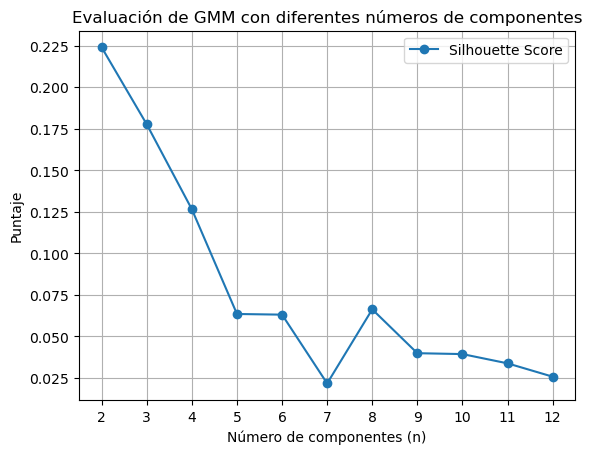

In [91]:
plt.plot(resumen_gmm['n'], resumen_gmm['silhouette'], marker='o', label='Silhouette Score')
plt.title('Evaluación de GMM con diferentes números de componentes')
plt.xlabel('Número de componentes (n)')
plt.ylabel('Puntaje')
plt.xticks(resumen_gmm['n'])
plt.legend()
plt.grid()
plt.show()

Se puede observar que el mejor coeficiente de silueta ocurre para n=2, es decir, dos tipos de granos clasificados. Construimos entonces nuestro modelo sobre este valor

In [93]:
gmm = GaussianMixture(n_components=2, covariance_type='full', init_params='kmeans', n_init=10, tol=1e-4, random_state=42)
labels = gmm.fit_predict(senecafe_reducido)

#Veamos como es cada cluster
print("Tamaño de cada cluster:")
print(pd.Series(labels, name="Cluster").value_counts())

Tamaño de cada cluster:
Cluster
1    4290
0    3405
Name: count, dtype: int64


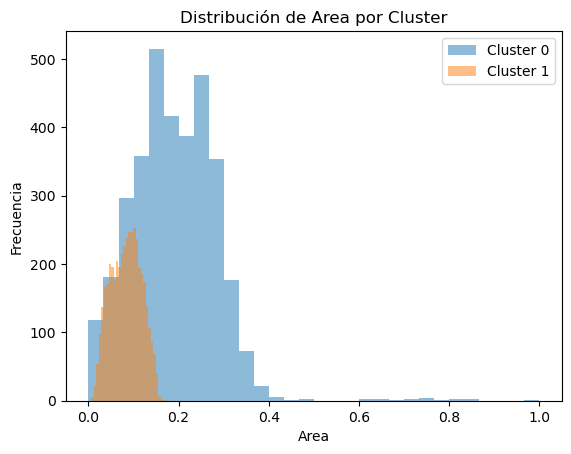

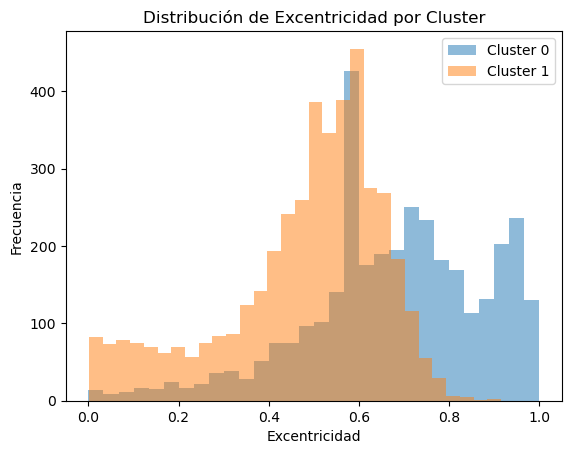

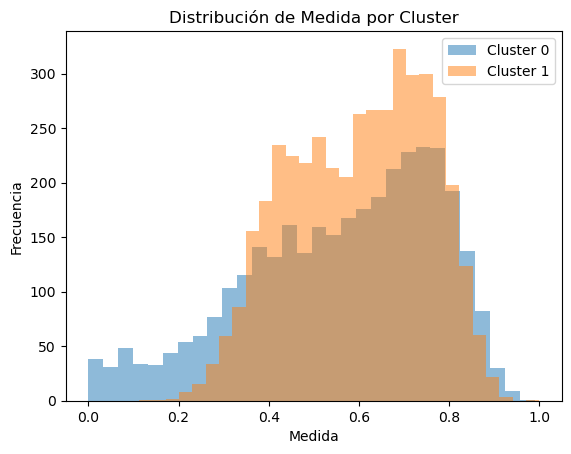

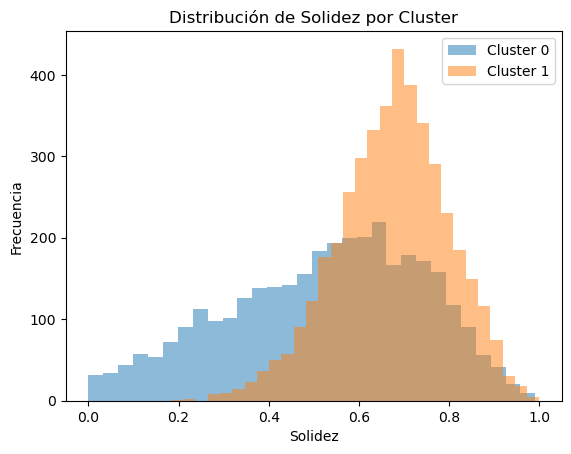

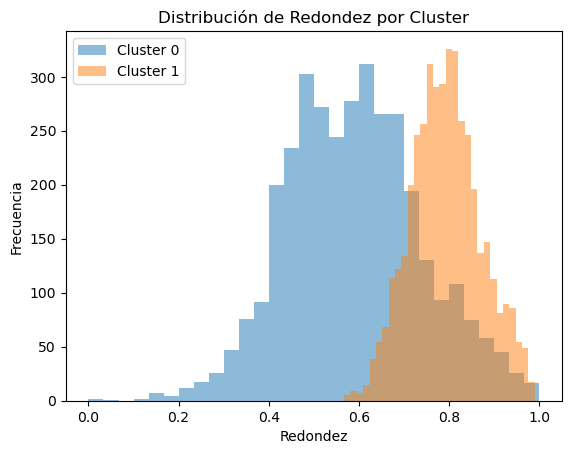

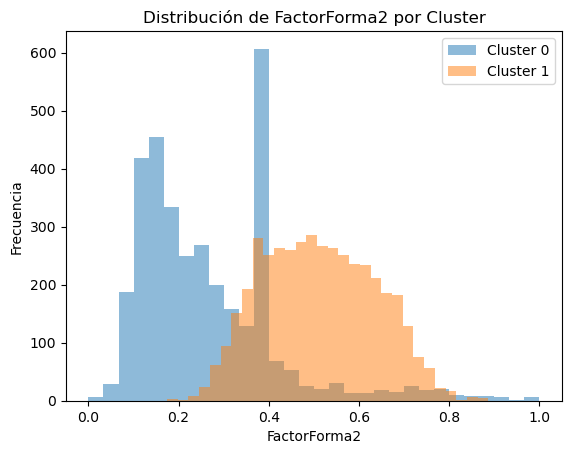

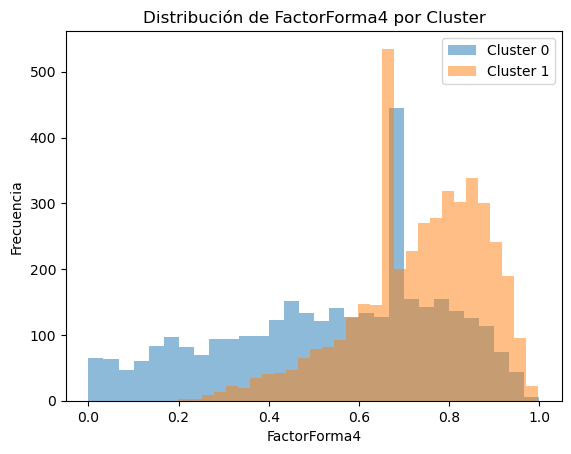

In [97]:
for col in senecafe_reducido.columns:
    plt.figure()
    for cluster in np.unique(labels):
        plt.hist(senecafe_reducido[col][labels == cluster], bins=30, alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Distribución de {col} por Cluster')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

In [125]:
columnas=senecafe_reducido.columns
columnas

Index(['Area', 'Excentricidad', 'Medida', 'Solidez', 'Redondez',
       'FactorForma2', 'FactorForma4'],
      dtype='object')

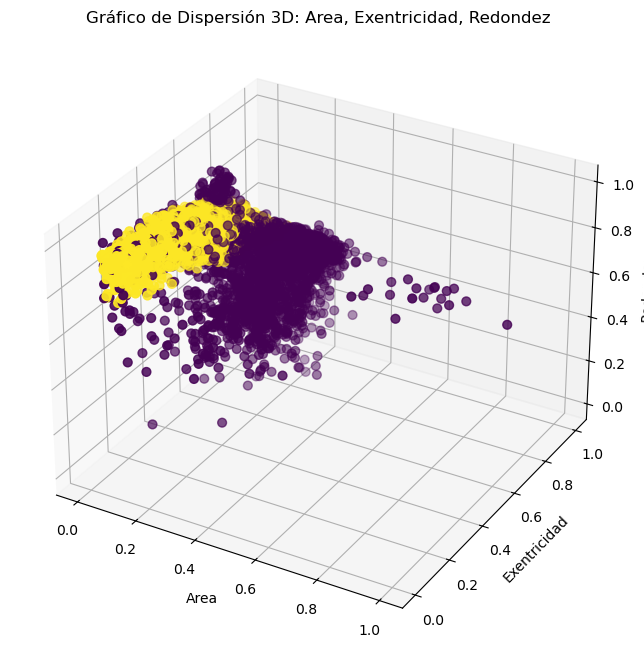

In [ ]:
# 2. CREAR LA FIGURA Y EL EJE 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(senecafe_reducido["Area"], senecafe_reducido["Excentricidad"], senecafe_reducido["Redondez"], c=labels, s=40, cmap='viridis')
ax.set_xlabel("Area")
ax.set_ylabel("Exentricidad")
ax.set_zlabel("Redondez")
ax.set_title(f'Análisis cualitativo: Gráfico de Dispersión 3D.Area, Exentricidad, Redondez.')
plt.show()


Se puede ver en los histogramas que el algortimo hace que las distribuciones de los parámetros sean parcialmente normales, lo cual sigue la filosofía del algoritmo. Sin embargo, el algoritmo siguiendo este procedimiento no es capaz de alcanzar resultados como los de KNN.

## 8. Uso de IA

### Ana María Hernández Lasso

### Juan Sebastián Ardila López

Para este taller, se hizo uso del modelo Gemini 2.5 Pro de la siguiente forma:

- Se consultaron alternativas de algoritmos de clasificación, con esto, descubrí el algoritmo GMM.
- Se consultaron fuentes para implementar el algoritmo, lo cual llevó a la documentación de GaussianMixture en Sklearn
- Se utilizó Gemini para hacer debug de un pequeño error con el que se contaba en la ejecución

### William Andrés Bayona Vergara
